## Exemplo 1 - Distribuição Gamma

Comparando modelos:

- Modelo 1: Regressão Linear
- Modelo 2: GLM Gaussiano com ligação log
- Modelo 3: GLM Gamma com ligação log

Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

**Dados fornecidos**


In [2]:
media_leite = [0.31, 0.39, 0.50, 0.58, 0.59, 0.64, 0.68, 0.66,
               0.67, 0.70, 0.72, 0.68, 0.65, 0.64, 0.57, 0.48,
               0.46, 0.45, 0.31, 0.33, 0.36, 0.30, 0.26, 0.34,
               0.29, 0.31, 0.29, 0.20, 0.15, 0.18, 0.11, 0.07,
               0.06, 0.01, 0.01]

semanas = np.arange(1, 36)
log_semanas = np.log(semanas)

Criando um DataFrame com os dados

In [3]:
dados = pd.DataFrame({
    'semanas': semanas,
    'log_semanas': log_semanas,
    'media_leite': media_leite
})

Gráfico de dispersão

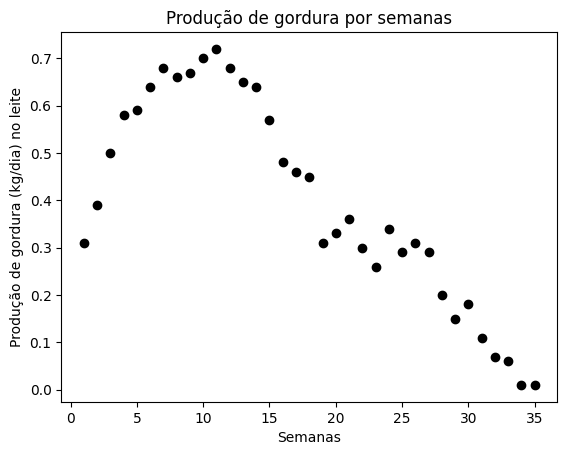

In [4]:
plt.scatter(semanas, media_leite, color='black')
plt.xlabel('Semanas')
plt.ylabel('Produção de gordura (kg/dia) no leite')
plt.title('Produção de gordura por semanas')
plt.show()

Transformando a variável resposta

In [5]:
log_media_leite = np.log(dados['media_leite'])

In [6]:
# Modelo 1: Linear (com log da resposta)
mod1 = smf.ols('log_media_leite ~ semanas + log_semanas', data=dados).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        log_media_leite   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     57.38
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           2.61e-11
Time:                        21:50:04   Log-Likelihood:                -24.383
No. Observations:                  35   AIC:                             54.77
Df Residuals:                      32   BIC:                             59.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5556      0.360     -4.324      

#### 2. **Visualização dos resíduos**:
   - **Resíduos vs Valores Ajustados**: Essa visualização é crucial para verificar a homocedasticidade (constância da variância dos resíduos).
   - No gráfico, as linhas horizontais vermelhas indicam onde os resíduos devem oscilar ao redor de zero para modelos adequados.

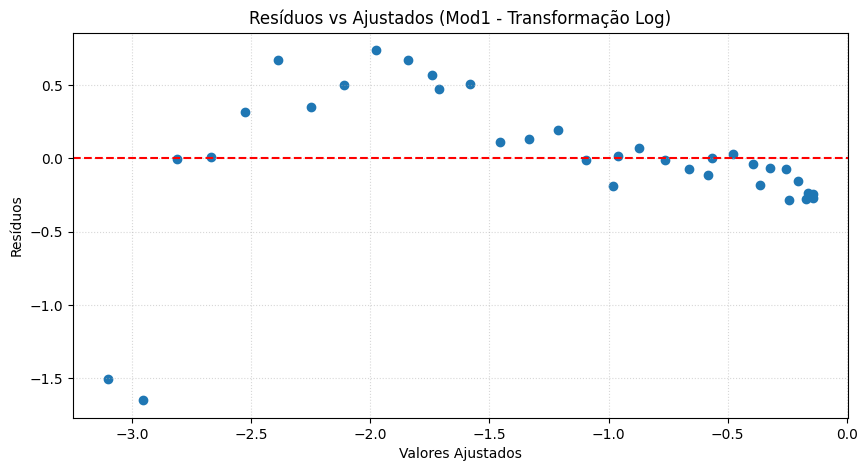

In [7]:
# Visualização dos Resíduos

# Resíduos Modelo 1 (Linear com transformação log)
plt.figure(figsize=(10, 5))
plt.scatter(mod1.fittedvalues, mod1.resid)
plt.axhline(0, linestyle='--', color='red')
plt.title('Resíduos vs Ajustados (Mod1 - Transformação Log)')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')

# Melhorando a escala e visualização
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()

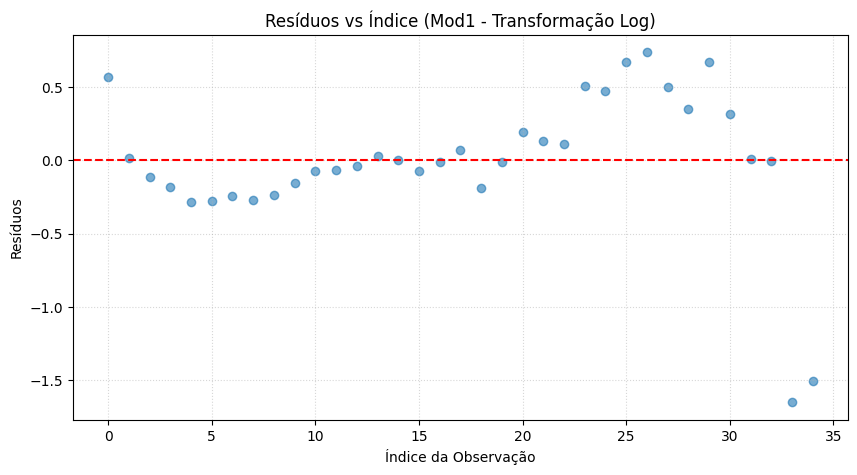

In [8]:
# Criando o gráfico de resíduos pelo índice
plt.figure(figsize=(10, 5))
plt.scatter(mod1.resid.index, mod1.resid, alpha=0.6)  # Índice no eixo X
plt.axhline(0, linestyle='--', color='red')  # Linha de referência em y=0
plt.title('Resíduos vs Índice (Mod1 - Transformação Log)')
plt.xlabel('Índice da Observação')
plt.ylabel('Resíduos')

# Melhorando a escala e visualização
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()

In [9]:
# Modelo 2: GLM Gaussiano com função de ligação logarítmica
mod2 = smf.glm('media_leite ~ semanas + log_semanas', 
               data=dados, 
               family=sm.families.Gaussian(sm.families.links.log())).fit()

print(mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            media_leite   No. Observations:                   35
Model:                            GLM   Df Residuals:                       32
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                       0.0028757
Method:                          IRLS   Log-Likelihood:                 54.238
Date:                Mon, 10 Mar 2025   Deviance:                     0.092022
Time:                        21:51:48   Pearson chi2:                   0.0920
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.4124      0.116    -12.150      

C:\Users\anail\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


#### 2. **Visualização dos resíduos**:
   - **Resíduos vs Valores Ajustados**: Essa visualização é crucial para verificar a homocedasticidade (constância da variância dos resíduos).
   - No gráfico, as linhas horizontais vermelhas indicam onde os resíduos devem oscilar ao redor de zero para modelos adequados.

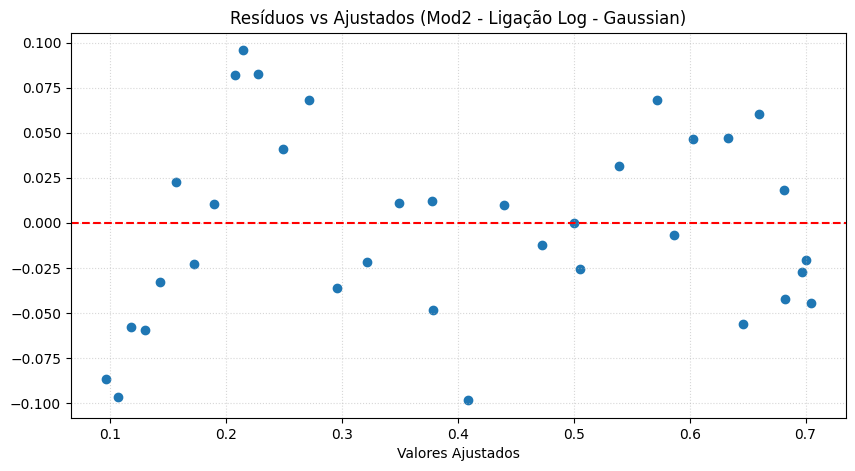

In [10]:
# Resíduos Modelo 2 (GLM Gaussiano com ligação log)
plt.figure(figsize=(10, 5))
plt.scatter(mod2.fittedvalues, mod2.resid_pearson)
plt.axhline(0, linestyle='--', color='red')
plt.title('Resíduos vs Ajustados (Mod2 - Ligação Log - Gaussian)')
plt.xlabel('Valores Ajustados')


plt.grid(True, linestyle=":", alpha=0.5)
plt.show()

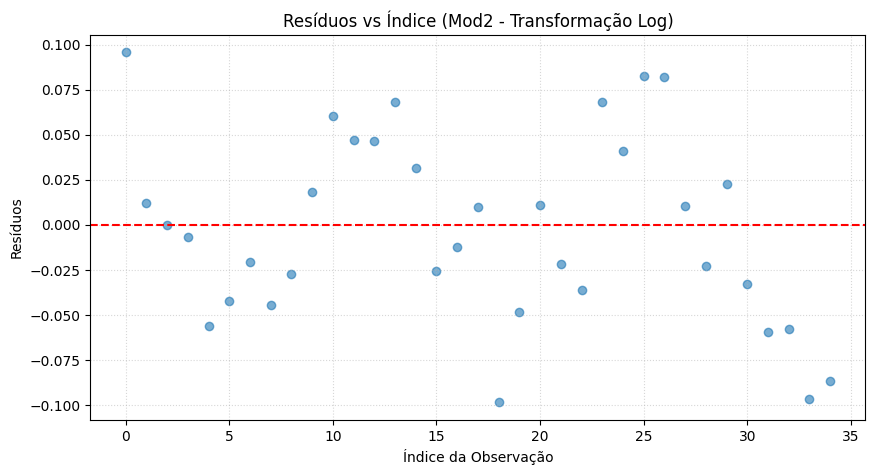

In [11]:
# Gráfico de resíduos pelo índice
plt.figure(figsize=(10, 5))
plt.scatter(mod2.model.data.row_labels, mod2.resid_pearson, alpha=0.6)  # Índice no eixo X
plt.axhline(0, linestyle='--', color='red')  # Linha de referência em y=0
plt.title('Resíduos vs Índice (Mod2 - Transformação Log)')
plt.xlabel('Índice da Observação')
plt.ylabel('Resíduos')

# Melhorando a escala e visualização
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()

In [12]:
# Modelo 3: GLM Gamma com função de ligação logarítmica
mod3 = smf.glm('media_leite ~ semanas + log_semanas', 
               data=dados, 
               family=sm.families.Gamma(sm.families.links.log())).fit()
print(mod3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            media_leite   No. Observations:                   35
Model:                            GLM   Df Residuals:                       32
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                         0.11728
Method:                          IRLS   Log-Likelihood:                 21.742
Date:                Mon, 10 Mar 2025   Deviance:                       6.1677
Time:                        21:53:31   Pearson chi2:                     3.75
No. Iterations:                    17   Pseudo R-squ. (CS):             0.9772
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.3860      0.243     -5.713      

C:\Users\anail\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


#### 2. **Visualização dos resíduos**:
   - **Resíduos vs Valores Ajustados**: Essa visualização é crucial para verificar a homocedasticidade (constância da variância dos resíduos).
   - No gráfico, as linhas horizontais vermelhas indicam onde os resíduos devem oscilar ao redor de zero para modelos adequados.

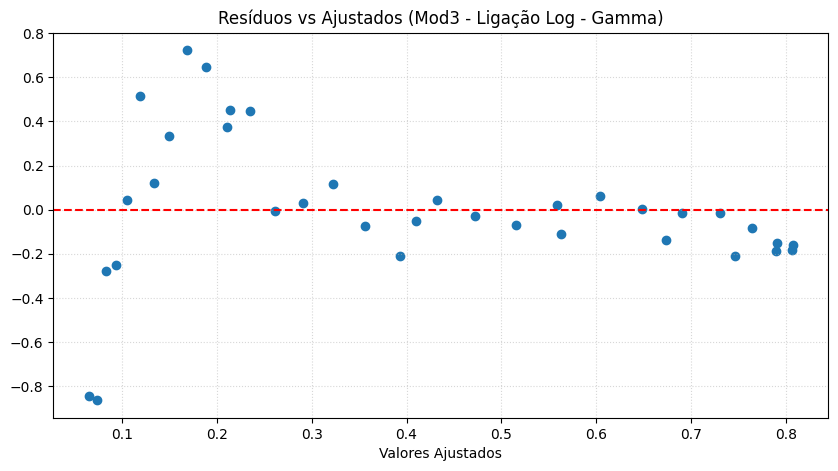

In [13]:
# Resíduos Modelo 3 (GLM Gamma com ligação log)
plt.figure(figsize=(10, 5))
plt.scatter(mod3.fittedvalues, mod3.resid_pearson)
plt.axhline(0, linestyle='--', color='red')
plt.title('Resíduos vs Ajustados (Mod3 - Ligação Log - Gamma)')
plt.xlabel('Valores Ajustados')

# Melhorando a escala e visualização
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()

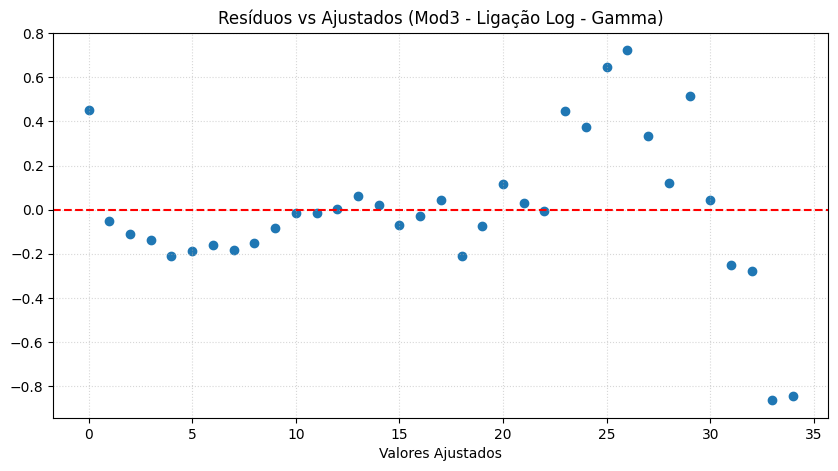

In [14]:
# Gráfico de resíduos pelo índice - Modelo 3 (GLM Gamma com ligação log)
plt.figure(figsize=(10, 5))
plt.scatter(mod3.model.data.row_labels, mod3.resid_pearson)
plt.axhline(0, linestyle='--', color='red')
plt.title('Resíduos vs Ajustados (Mod3 - Ligação Log - Gamma)')
plt.xlabel('Valores Ajustados')

# Melhorando a escala e visualização
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()

1. **Comparação gráfica dos ajustes dos modelos**:
   - Um gráfico que mostra os ajustes de cada um dos três modelos em relação aos valores observados.
   - Os modelos são: `Transformação Log`, `Ligação Log (Gaussian)`, e `Ligação Log (Gamma)`.

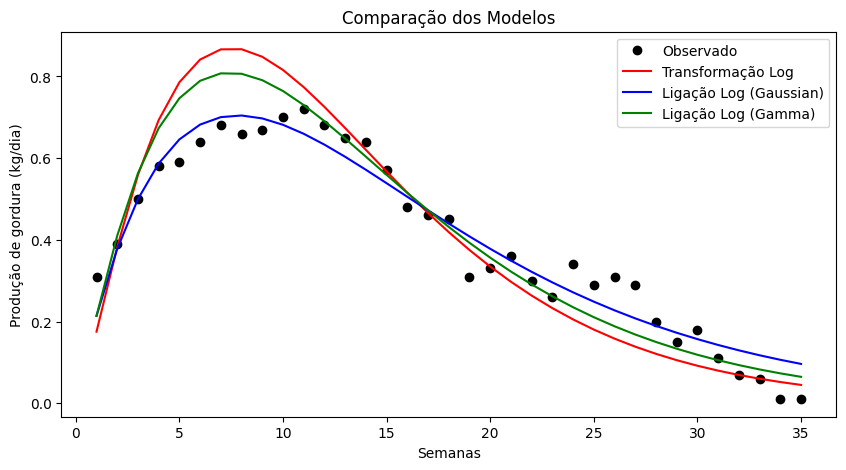

In [16]:
# Gráfico de comparação dos ajustes dos modelos
plt.figure(figsize=(10, 5))
plt.plot(semanas, media_leite, 'ko', label='Observado')
plt.plot(semanas, np.exp(mod1.fittedvalues), 'r-', label='Transformação Log')
plt.plot(semanas, mod2.fittedvalues, 'b-', label='Ligação Log (Gaussian)')
plt.plot(semanas, mod3.fittedvalues, 'g-', label='Ligação Log (Gamma)')
plt.xlabel('Semanas')
plt.ylabel('Produção de gordura (kg/dia)')
plt.legend()
plt.title('Comparação dos Modelos')
plt.show()

In [17]:
# Análise de comparação de AIC e deviance entre os modelos
print("Comparação de Métricas entre Modelos:")
print(f"Modelo 1 (Transformação Log): AIC = {mod1.aic}")
print(f"Modelo 2 (Ligação Log - Gaussian): AIC = {mod2.aic}")
print(f"Modelo 3 (Ligação Log - Gamma): AIC = {mod3.aic}")

Comparação de Métricas entre Modelos:
Modelo 1 (Transformação Log): AIC = 54.76656070454745
Modelo 2 (Ligação Log - Gaussian): AIC = -102.47545771935033
Modelo 3 (Ligação Log - Gamma): AIC = -37.483871358476506


O AIC pode ser negativo se o log-verossimilhança for muito alto.

Modelos diferentes (Gaussian, Gamma, Poisson) podem ter escalas de log-verossimilhança bem diferentes.

O importante não é o sinal do AIC, mas sim qual modelo tem o menor AIC — esse será o preferido.

In [18]:
# Comparação de deviance
print(f"Deviance Mod2: {mod2.deviance}")
print(f"Deviance Mod3: {mod3.deviance}")

Deviance Mod2: 0.09202217762183347
Deviance Mod3: 6.167664594534804


### Interpretação dos Resultados:

1. **Modelo 1 (Transformação Log)**:
   - O modelo de transformação log apresentou alguns problemas com os resíduos, como mostrado no gráfico de resíduos vs valores ajustados.
   - O teste de Shapiro-Wilk para os resíduos indicou uma possível violação da suposição de normalidade.

2. **Modelo 2 (GLM Gaussiano com Ligação Log)**:
   - O Modelo 2 apresentou uma melhora significativa nos resíduos em comparação ao Modelo 1. No gráfico de resíduos, os valores estão distribuídos de forma mais aleatória em torno de zero.

3. **Modelo 3 (GLM Gamma com Ligação Log)**:
   - O Modelo 3 também apresentou um ajuste bom e, em algumas situações, o modelo Gamma pode ser mais adequado para dados como esses, onde há uma relação de variância crescente com os valores ajustados.

### Resultados:
- O uso de um modelo GLM com ligação log foi mais eficiente do que a simples transformação da variável resposta.
- O Modelo 2 (GLM Gaussian) parece ser o mais adequado para descrever a produção de gordura no leite ao longo das semanas.

###  Suposições do GLM Gaussiano (Verificação de Diagnósticos)
O modelo GLM Gaussiano com ligação log faz algumas suposições que precisam ser verificadas:

**(a) Normalidade dos Resíduos **

No GLM Gaussiano, os resíduos devem ser aproximadamente normalmente distribuídos. Podemos verificar isso com:

Histograma dos resíduos
Gráfico Q-Q Plot
Teste de Shapiro-Wilk ou Kolmogorov-Smirnov

C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


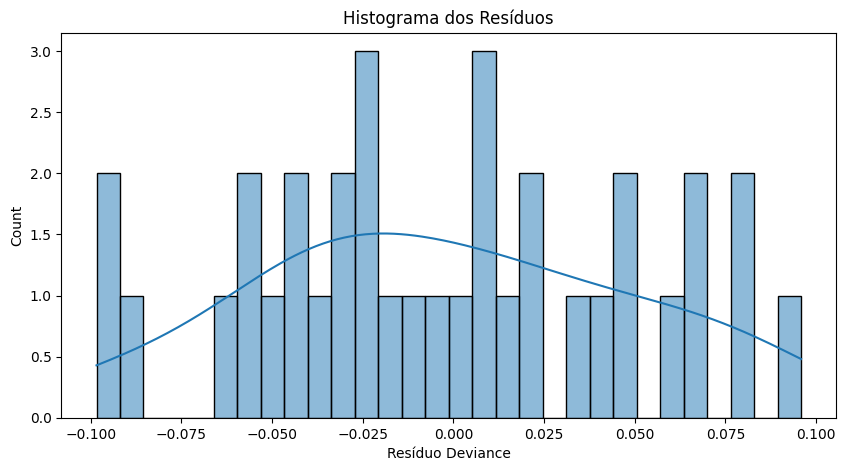

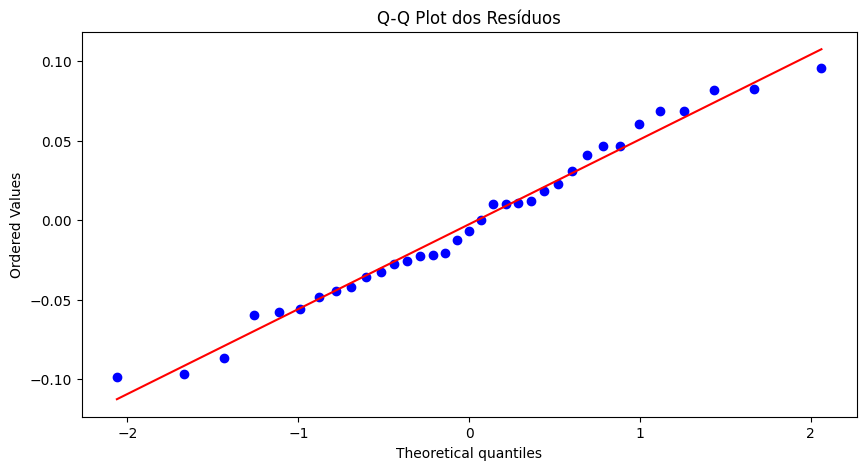

Shapiro-Wilk p-valor: 0.616876482963562


In [19]:
import seaborn as sns
# Obtendo os resíduos de deviance (mais apropriado para GLM)
residuos = mod2.resid_deviance

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, bins=30)
plt.title("Histograma dos Resíduos")
plt.xlabel("Resíduo Deviance")
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 5))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot dos Resíduos")
plt.show()

# Teste de normalidade
shapiro_test = stats.shapiro(residuos)
print(f"Shapiro-Wilk p-valor: {shapiro_test.pvalue}")

**(b) Homocedasticidade (Variância constante dos resíduos)**

No GLM Gaussiano, a variância dos resíduos deve ser constante ao longo dos valores ajustados.
Podemos verificar isso com um gráfico de resíduos vs valores ajustados.

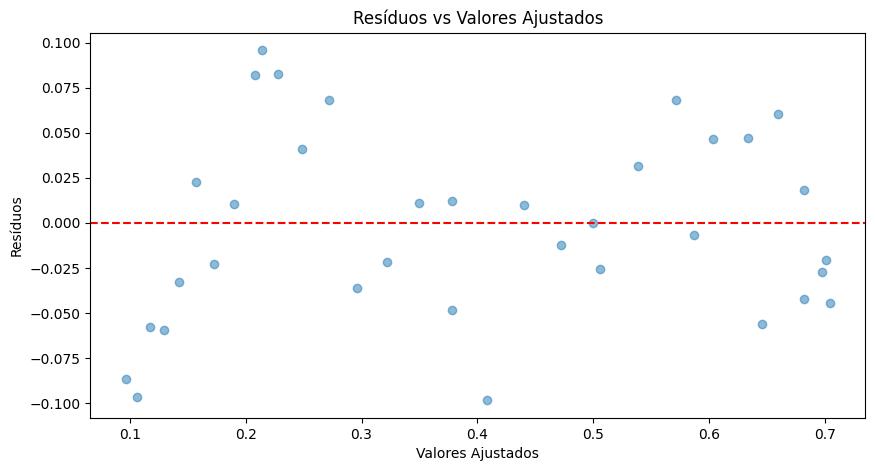

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(mod2.fittedvalues, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()

###  2. Avaliação da Qualidade do Ajuste

Além das suposições, podemos avaliar se o modelo está realmente ajustando bem os dados.

(a) Verificar R² de um modelo GLM

(b) Teste de Wald (Significância dos coeficientes)

In [21]:
print(mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            media_leite   No. Observations:                   35
Model:                            GLM   Df Residuals:                       32
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                       0.0028757
Method:                          IRLS   Log-Likelihood:                 54.238
Date:                Mon, 10 Mar 2025   Deviance:                     0.092022
Time:                        21:57:04   Pearson chi2:                   0.0920
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.4124      0.116    -12.150      

(c) Teste de Deviance (Comparação com Modelo Nulo)

O teste de deviance compara o modelo atual com um modelo nulo (apenas intercepto).

In [22]:
print(f"Deviance Residual: {mod2.deviance}")
print(f"Null Deviance: {mod2.null_deviance}")

Deviance Residual: 0.09202217762183347
Null Deviance: 1.6392285714285713


Se a deviance residual for muito menor que a deviance nula, o modelo está explicando bem os dados.

### 3. Diagnóstico de Outliers
Podemos verificar outliers influentes com a Distância de Cook.

C:\Users\anail\AppData\Local\Temp\ipykernel_11100\1158728072.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)


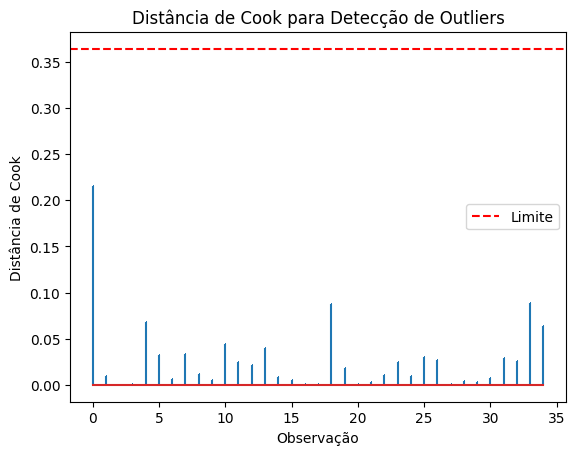

In [23]:
influence = mod2.get_influence()
cooks_d = influence.cooks_distance[0]

plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
plt.axhline(4 / len('media_leite'),color='red', linestyle="--", label="Limite")
plt.xlabel("Observação")
plt.ylabel("Distância de Cook")
plt.title("Distância de Cook para Detecção de Outliers")
plt.legend()
plt.show()